# Image Segmentation

The main objectives of this module are:

* Use & compare different methods of segmentation:
    * Histogram-based
    * Texture-based
    * Region growing
* Detect objects and extract object features.
* Understand corner detection and basic object recognition

## 1. Histogram segmentation

In histogram segmentation, we make the hypothesis that the histogram is composed of distinct separable distributions, and we try to find the best threshold to separate those distributions.

The code below uses a default threshold of 127 to segment the image. Modify it to:

1. Create a function to compute the optimal threshold for an 8 bit image. Apply on the cameraman image.
1. Compute the Otsu threshold for an 8-bit image, by optimizing within variance or inter-class variance for each possible theshold *t*. See [here](http://nbviewer.jupyter.org/github/odebeir/info-h-500-501/blob/ver_2016-2017/04-Image%20segmentation/01-Histogram%20based%20image%20segmentation.ipynb) how to compute the Otsu threshold.

Text(0.5, 1.0, 'Otsu thresholding')

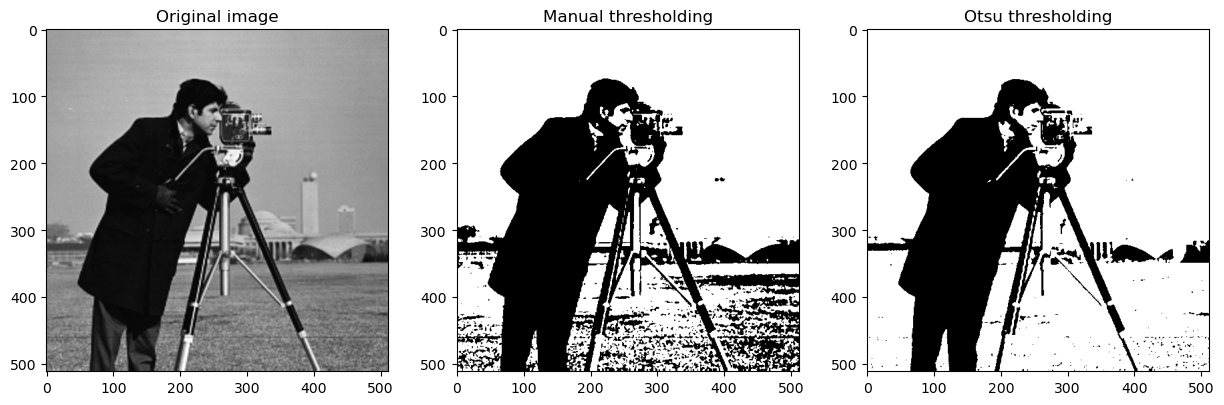

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread, imshow

def manual_threshold(im, T):
    return im>T

# Determine the optimal threshold for a given image
def optimal_threshold(im, T0):
    hist, bins = np.histogram(im, bins=256)
    T = T0
    while True:
        T1 = round(T)
        T = (np.sum(np.arange(0, T1) * hist[0:T1]) + np.sum(np.arange(T1, 256) * hist[T1:256])) / np.sum(hist)
        if round(T) == T1:
            break
    return T

# Determine the optimal threshold for a given image using Otsu's method
def otsu_threshold(im):
    hist, bins = np.histogram(im, bins=256)
    hist = hist / np.sum(hist)
    T = 0
    max_var = 0
    for t in range(1, 256):
        w0 = np.sum(hist[0:t])
        w1 = np.sum(hist[t:256])
        m0 = np.sum(np.arange(0, t) * hist[0:t]) / w0
        m1 = np.sum(np.arange(t, 256) * hist[t:256]) / w1
        var = w0 * w1 * (m0 - m1) ** 2
        if var > max_var:
            max_var = var
            T = t
    return T

# Display the results of the thresholding for the 2 methods

# Load the image
im = imread('camera.jpg')
# Determine the optimal threshold
T = optimal_threshold(im, 128)
# Determine the optimal threshold using Otsu's method
T_otsu = otsu_threshold(im)
# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(im, cmap=cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(manual_threshold(im, T), cmap=cm.gray)
ax[1].set_title('Manual thresholding')
ax[2].imshow(manual_threshold(im, T_otsu), cmap=cm.gray)
ax[2].set_title('Otsu thresholding')


In [2]:
def plot_histogram_with_threshold(im, T):
    plt.figure(figsize=(15,5))
    h = plt.hist(im.flatten(), bins=range(256))
    plt.plot([T,T],[0,h[0].max()], 'r-')
    plt.show()

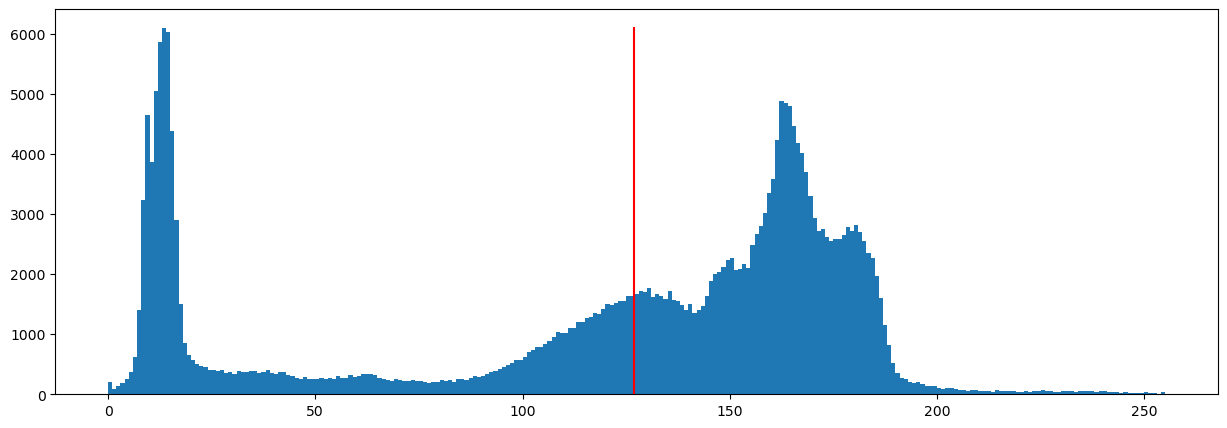

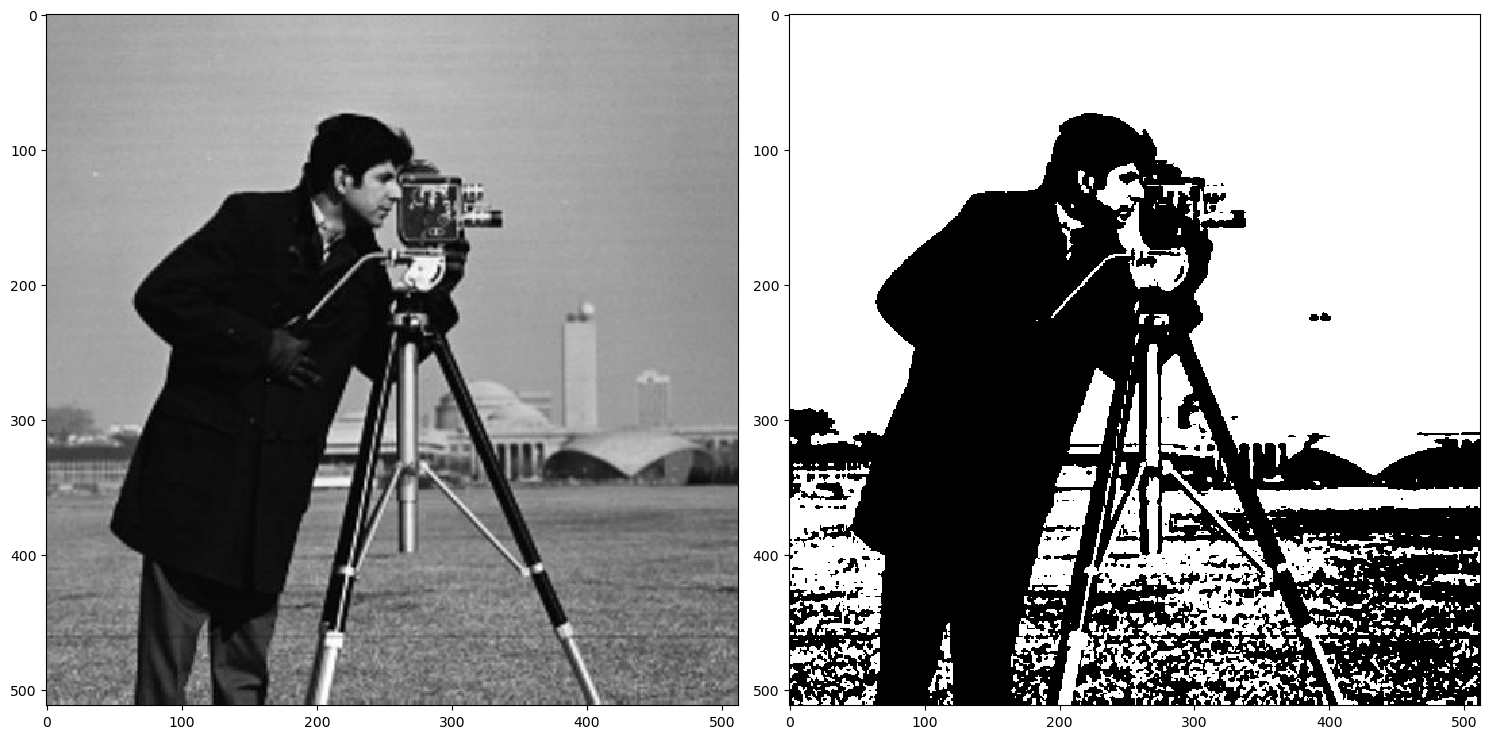

In [3]:
im = imread('camera.jpg')

T = 127 
im_segmented = manual_threshold(im, T)

plot_histogram_with_threshold(im, T)

# Show original image & segmented binary image
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
imshow(im_segmented)
plt.show()

**Need more help? You can check the following videos:**

* [Manual thresholding](https://www.youtube.com/watch?v=rgKkws_fqz4&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=24)
* [Optimal threshold](https://www.youtube.com/watch?v=7B1cs0PARtg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=25)
* [Otsu threshold](https://www.youtube.com/watch?v=mz26bssSLds&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=26)

## 2. Texture segmentation

Texture segmentation uses regional descriptors to segment the image based on the local texture. A simple algorithm is provided below, which:

* Extract neighborhoods with the sliding window method
* Compute the local maximum on the neighborhood and put it in a "descriptor" image
* Use Otsu thresholding on the descriptor image to segment it
* Display the results

/home/max/anaconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


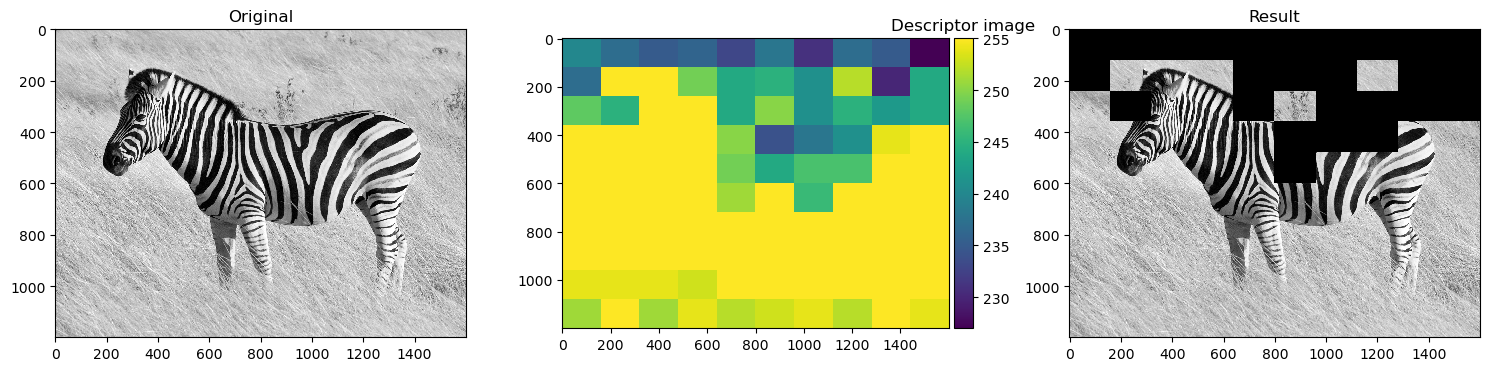

In [4]:
from skimage.filters.rank import entropy
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte

def texture_descriptor(N):
    e = N.max() # Replace with your descriptor
    return e

def sliding_window(im, PATCH_SIZE):
    output = np.zeros((im.shape[0], im.shape[1]))
    for i in range(0, im.shape[0]-PATCH_SIZE[0]+1, PATCH_SIZE[0]):
        for j in range(0, im.shape[1]-PATCH_SIZE[1]+1, PATCH_SIZE[1]):
            patch = im[i:i+PATCH_SIZE[0], j:j+PATCH_SIZE[1]]
            output[i:i+PATCH_SIZE[0], j:j+PATCH_SIZE[1]] = texture_descriptor(patch)
    return output

# Open zebra image as an 8-bit integer grayscale
im = img_as_ubyte(imread("zebra.jpg", as_gray=True))

im_descr = sliding_window(im,(120,160))
T = threshold_otsu(im_descr)
mask = im_descr>T

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
imshow(im)
plt.title('Original')
plt.subplot(1,3,2)
imshow(im_descr)
plt.title('Descriptor image')
plt.subplot(1,3,3)
imshow(im*mask)
plt.title('Result')
plt.show()

Using the above example as a starting point, replace the "maximum" texture descriptor by properties from the co-occurrence matrix:
* Compute the co-occurrence matrix on the neighborhood (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix)). Test different angles & displacements.
* Test different properties (see [greycoprops](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycoprops))

Try to segment the zebra image as best as you can using those descriptors.

**Need more help? You can check the following videos:**

* [Region descriptors](https://www.youtube.com/watch?v=5F9aPiab8PA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=27)
* [Properties of the co-occurrence matrix](https://www.youtube.com/watch?v=NR3vrkZ9tyg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=28)
* [Texture segmentation](https://www.youtube.com/watch?v=b-SGhLu-R0c&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=29)

## 3. Region growing

In region growing algorithms, we start from "markers" which act as seed points, and grow the segmented regions from those markers. A well-known region-growing algorithm uses the watershed transform. The example below uses the watershed transform on the cameraman image, with hand-picked markers:

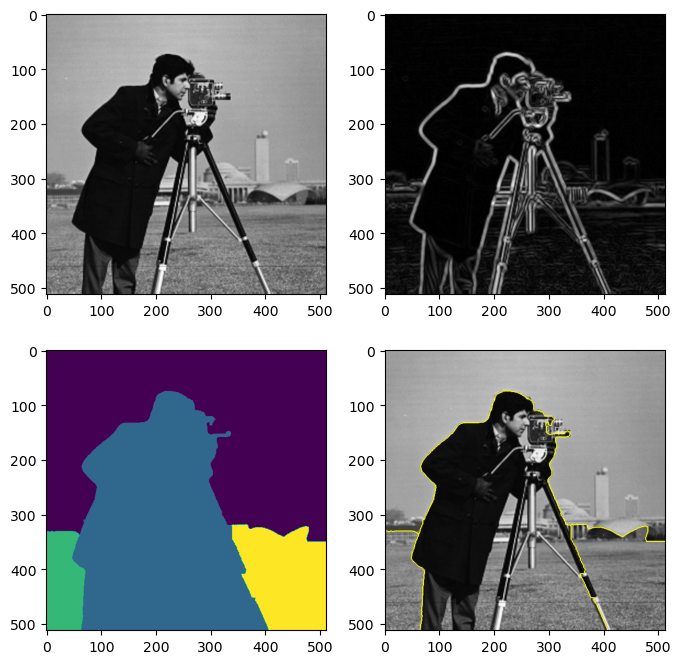

In [5]:
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries, watershed
from skimage.io import imread

im = imread('camera.jpg')

smoothing_factor = 4
# Compute the gradients of the image:
gradient = skr.gradient(skr.mean(im, disk(smoothing_factor)), disk(1))

# Hand-picked markers for the road image
markers_coordinates = [
    [10,256], # sky
    [200,150],# cameraman
    [400,20], # grass (left)
    [400,450] # grass (right)
]

markers = np.zeros_like(im)
for i,(row,col) in enumerate(markers_coordinates):
    markers[row,col] = i+1

ws = watershed(gradient, markers)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(im,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(im,ws));

Adapt this method to work on the road image.

Can you find a way to automatically determine the markers?

ValueError: Image dimensions and neighborhood dimensionsdo not match

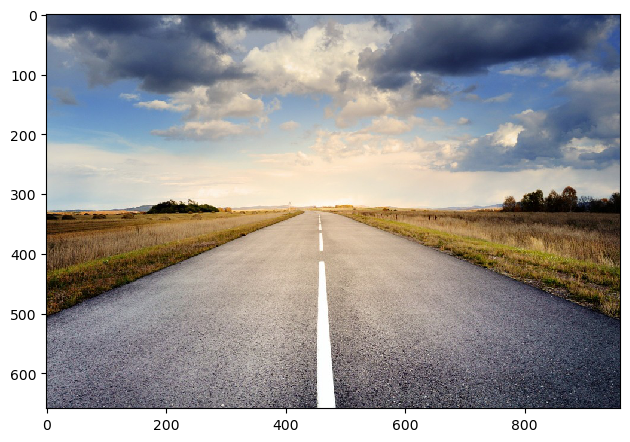

In [9]:
import numpy as np
from skimage.io import imread
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries, watershed
from skimage.io import imread


im = imread('road.jpg')

imshow(im)

smoothing_factor = 4

# Apply mean filter to smooth the image
im = skr.mean(im, disk(smoothing_factor))

# Compute the gradient of the image
gradient = skr.gradient(im, disk(1))

# Set the markers where the grandient is minimal
markers = np.zeros_like(im)
markers[gradient<0.1] = 1

# Perform the watershed
ws = watershed(gradient, markers)

# Display the results
plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(im,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(im,ws));








Another use of the watershed transform is to separate overlapping object, as in the image below.

* Compute the [distance transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.distance_transform_edt.html#scipy.ndimage.distance_transform_edt) of the image.
* Use the result to automatically find good markers.
* Use the watershed transform to separate the three objects.

/tmp/ipykernel_6660/3964798646.py:19: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(dist, indices=False, footprint=np.ones((3, 3)),labels=im)


Text(0.5, 1.0, 'Watershed')

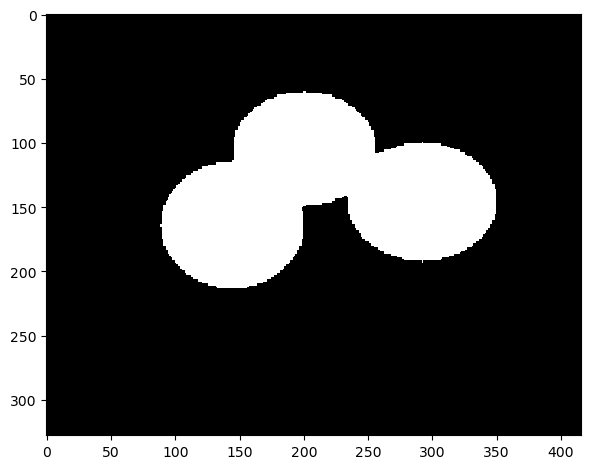

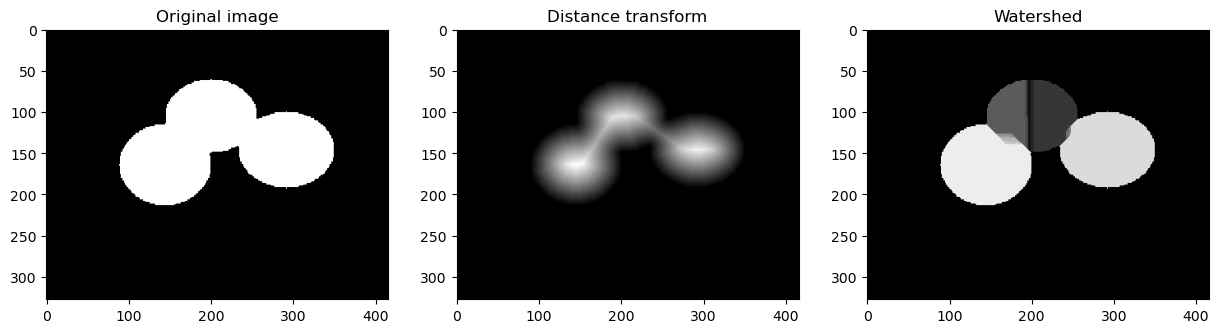

In [6]:
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2gray
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np


im = rgb2gray(imread('separ.png'))==0
imshow(im)


# Compute the distance transform
dist = distance_transform_edt(im)

# Compute the local maxima
local_maxi = peak_local_max(dist, indices=False, footprint=np.ones((3, 3)),labels=im)

# Perform the watershed
markers = ndi.label(local_maxi)[0]
labels = watershed(-dist, markers, mask=im)

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(im, cmap=cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(dist, cmap=cm.gray)
ax[1].set_title('Distance transform')
ax[2].imshow(labels, cmap=cm.gray)
ax[2].set_title('Watershed')



**Need more help? You can check the following videos:**

* [Markers for region growing](https://www.youtube.com/watch?v=3e0-rE9zhFk&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=30)
* [Watershed transform](https://www.youtube.com/watch?v=GuVp7dlzEKE&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=31)
* [Distance transform](https://www.youtube.com/watch?v=s1eABOdNnVg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=32)

## 4. Object features

The next step after segmentation is often to extract object features in order to recognize, classify, or measure information about the objects.

Starting from the example below:

1. **Extract connected components** (see [label()](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#skimage.measure.label)) of the shapes image and **display the centroid of the objects** (see [regionprops()](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=regionprops#skimage.measure.regionprops))
1. For each image label, **extract the coordinates of the contour** (see [find_contours()](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.find_contours)) and **find the corners** of each objects.
1. Suggest a method to **classify the objects** in different categories.

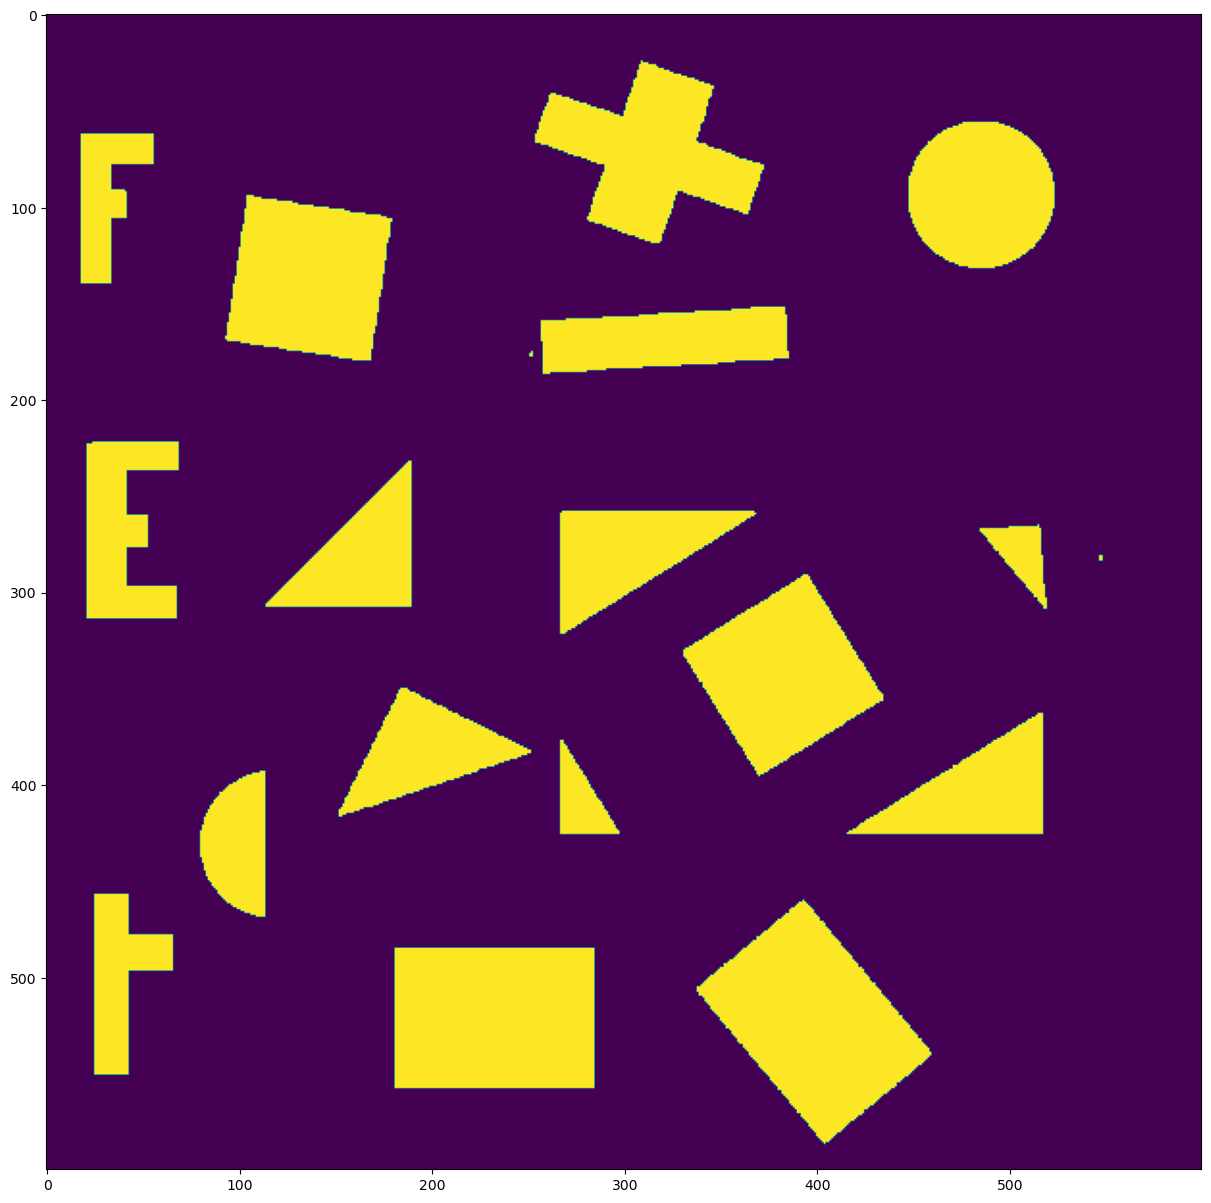

In [8]:
from skimage.measure import label, regionprops,find_contours

im = (imread('shapes.png')[:,:,0]>0).astype(int) #binarize & cast to integer to make it easier to process later

plt.figure(figsize=(15,15))
plt.imshow(im)
plt.show()

In [9]:

# Your code here


**Need more help? You can check the following videos:**

* [Object labeling & features](https://www.youtube.com/watch?v=7bOH4E7c8gU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=33)

# Coding project - Tumour segmentation

The image below is a slice of a brain MRI with a large tumour in it. The goal of this project is to create an algorithm to automatically segment the tumour.

Given that the resolution of the image is of 0.115 cm/px in both axis, estimate the area of the tumour (in cm²). 

uint8


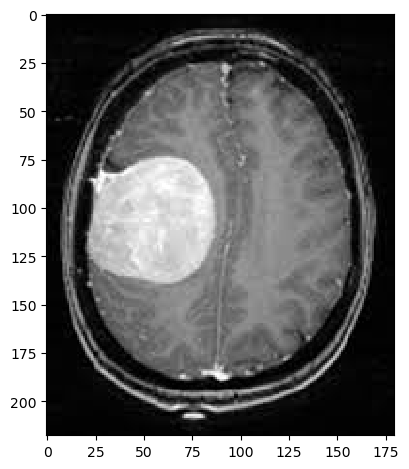

In [10]:
from skimage.io import imread,imshow
%matplotlib inline

im = imread('mri_brain.jpg')
# Print the pixels type
print(im.dtype)
imshow(im)

The surface of the tumor is:  46.671025 cm^2


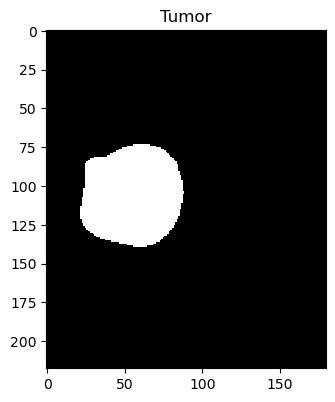

In [25]:
from skimage.filters.rank import mean
from skimage.morphology import disk
from skimage.filters import threshold_mean
import numpy as np
from skimage.io import imread
from skimage.io import imshow
import matplotlib.pyplot as plt
import skimage

def countDarkPixels(im):
    return np.sum(im<128)

def countWhitePixels(im):
    return np.sum(im>128)


def conv(im, squareSize):
    newIm = im.copy().astype(np.uint8)
    for i in range(squareSize,im.shape[0]-squareSize):
        for j in range(squareSize,im.shape[1]-squareSize):
            if countDarkPixels(im[i-squareSize:i+(squareSize + 1),j-squareSize:j+(squareSize + 1)]) < countWhitePixels(im[i-squareSize:i+(squareSize + 1),j-squareSize:j+(squareSize + 1)]):
                newIm[i,j] = 255
            else:
                newIm[i,j] = 0

    return newIm

def surface(tumor):
    pixelsInTumor = 0
    for i in range(tumor.shape[0]):
        for j in range(tumor.shape[1]):
            if tumor[i,j,0] == 255:
                pixelsInTumor += 1

    surface = pixelsInTumor*(0.115)**2
    return surface

im = imread('mri_brain.jpg')

# Since the tumor is brighter than the brain, we can use a simple thresholding
t = 0.6
lut2 = np.array(([0] * round(256 * t)) + ([255] * round(256 * (1 - t))))
im = lut2[im]

# The nwe remove the small objects
im = conv(im,5)

print("The surface of the tumor is: ", surface(im), "cm^2")

imshow(im, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.title("Tumor")
imshow(im)